# Ejercicios Random Networks vs Real Networks

## Ejercicios Diferencia en Distribución de Grados

Compare la distribución de grados de una red real contra una red aleatoria.

- Baje un red real de SNAP
- Cree una red aleatoria con el mismo número de links y nodos
- Compare la distribución de grados

N=333


/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


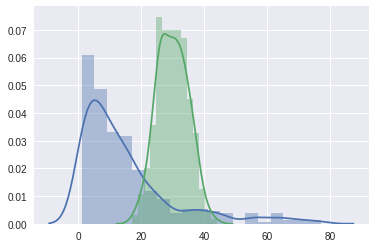

In [3]:
import numpy as np
import networkx as nx
import seaborn as sns

%matplotlib inline

edges = np.genfromtxt('0.edges', dtype="int", delimiter=" ")
G = nx.read_edgelist('0.edges', delimiter=" ")



def total_edges(edges):
    return (len(G.nodes())*(len(G.nodes()-1)))/2

def p_edges(edges):
    return 2*float(len(edges))/total_edges(edges)

N = len(G.nodes())
print("N=%d" %(N))
p = 2*len(edges)/(N*(N-1))
G_ran = nx.gnp_random_graph(N, p)

ax = sns.distplot(list(G.degree().values()))
sns.distplot(list(G_ran.degree().values()))


## Ejercicios Comparación Tamaño del componente Gigante

Genere varias realizaciones de la red aleatoria y compare el tamaño del componente gigante contra el de la red real

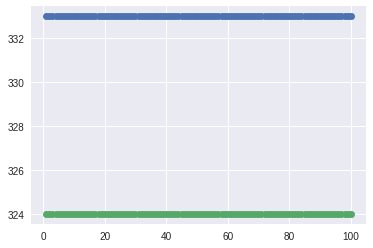

In [8]:
# Plot results
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

def biggest_component_size(N,p):
    G_ran = nx.gnp_random_graph(N,p)
    components_ran = list(nx.connected_component_subgraphs(G_ran))
    components_ran_len = [len(component) for component in components_ran]
    
    max_component_ran = 0
    max_index_ran = -1
    for i in range(0, len(components_ran_len)):
        if components_ran_len[i] > max_component_ran:
            max_component_ran = components_ran_len[i]
            max_index_ran = i
    
    random_network_biggest_component_size = (len(components_ran[max_index_ran]))
    
    components_real = list(nx.connected_component_subgraphs(G))
    
    components_real_len = [len(component) for component in components_real]
    
    max_component_real = 0
    max_index_real = -1
    for i in range(0, len(components_real_len)):
        if components_real_len[i] > max_component_real:
            max_component_real = components_real_len[i]
            max_index_real = i
    
    real_network_biggest_component_size = (len(components_real[max_index_real]))
    
    return (random_network_biggest_component_size, real_network_biggest_component_size)

def component_comparison(number_of_iterations, N, p):
    
    rand = []
    real = []
    for i in range(number_of_iterations):
        result = biggest_component_size(N,p)
        rand.append(result[0])
        real.append(result[1])
        
    sample = list(range(1,number_of_iterations+1))
    plt.plot(sample, rand, "o")
    
    plt.plot(sample, real, "o")

component_comparison(100,N,p)


## Ejercicio Comparación Número de componentes

Genera varias realizaciones de la red aleatoria y compare la cantidad de componentes